# RIVAN ALAMSYAH S
## FUZZY K-MEANS / DATA_KLAS

In [16]:
# Mengimport library yang diperlukan
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import seaborn as sns
from skfuzzy.cluster import cmeans
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
from fcmeans import FCM # library fuzzy c mean

# MENGGUNAKAN DATA KLAS

In [17]:
# Menginisialisasi data
data = pd.read_excel ('DATA_klas.xlsx')
data

,no,Nama,Mtt,Fisika,kimia,biologi,sejarah,akuntasi,Sosiologi,geografi
0,1,Anis Fadilah,79,75,75,85,76,78,76,80
1,2,Didik Mulyana,84,76,79,77,76,77,75,81
2,3,Eka Dwi Utami,77,84,78,85,92,89,77,82
3,4,Fandik Lasmana,78,86,84,77,78,77,75,75
4,5,Putri Khadijah,82,82,81,91,90,82,79,91
5,6,Lina Nur Aini,75,75,70,82,75,75,79,75
6,7,Mahmudin Ali,77,75,75,89,80,80,75,75
7,8,M.Roemly,77,76,70,77,77,80,75,80
8,9,Misbahus Surur,79,76,75,84,77,81,76,77
9,10,Putra Adi Wijaya,80,75,75,75,75,78,77,79


C:\Users\alams\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


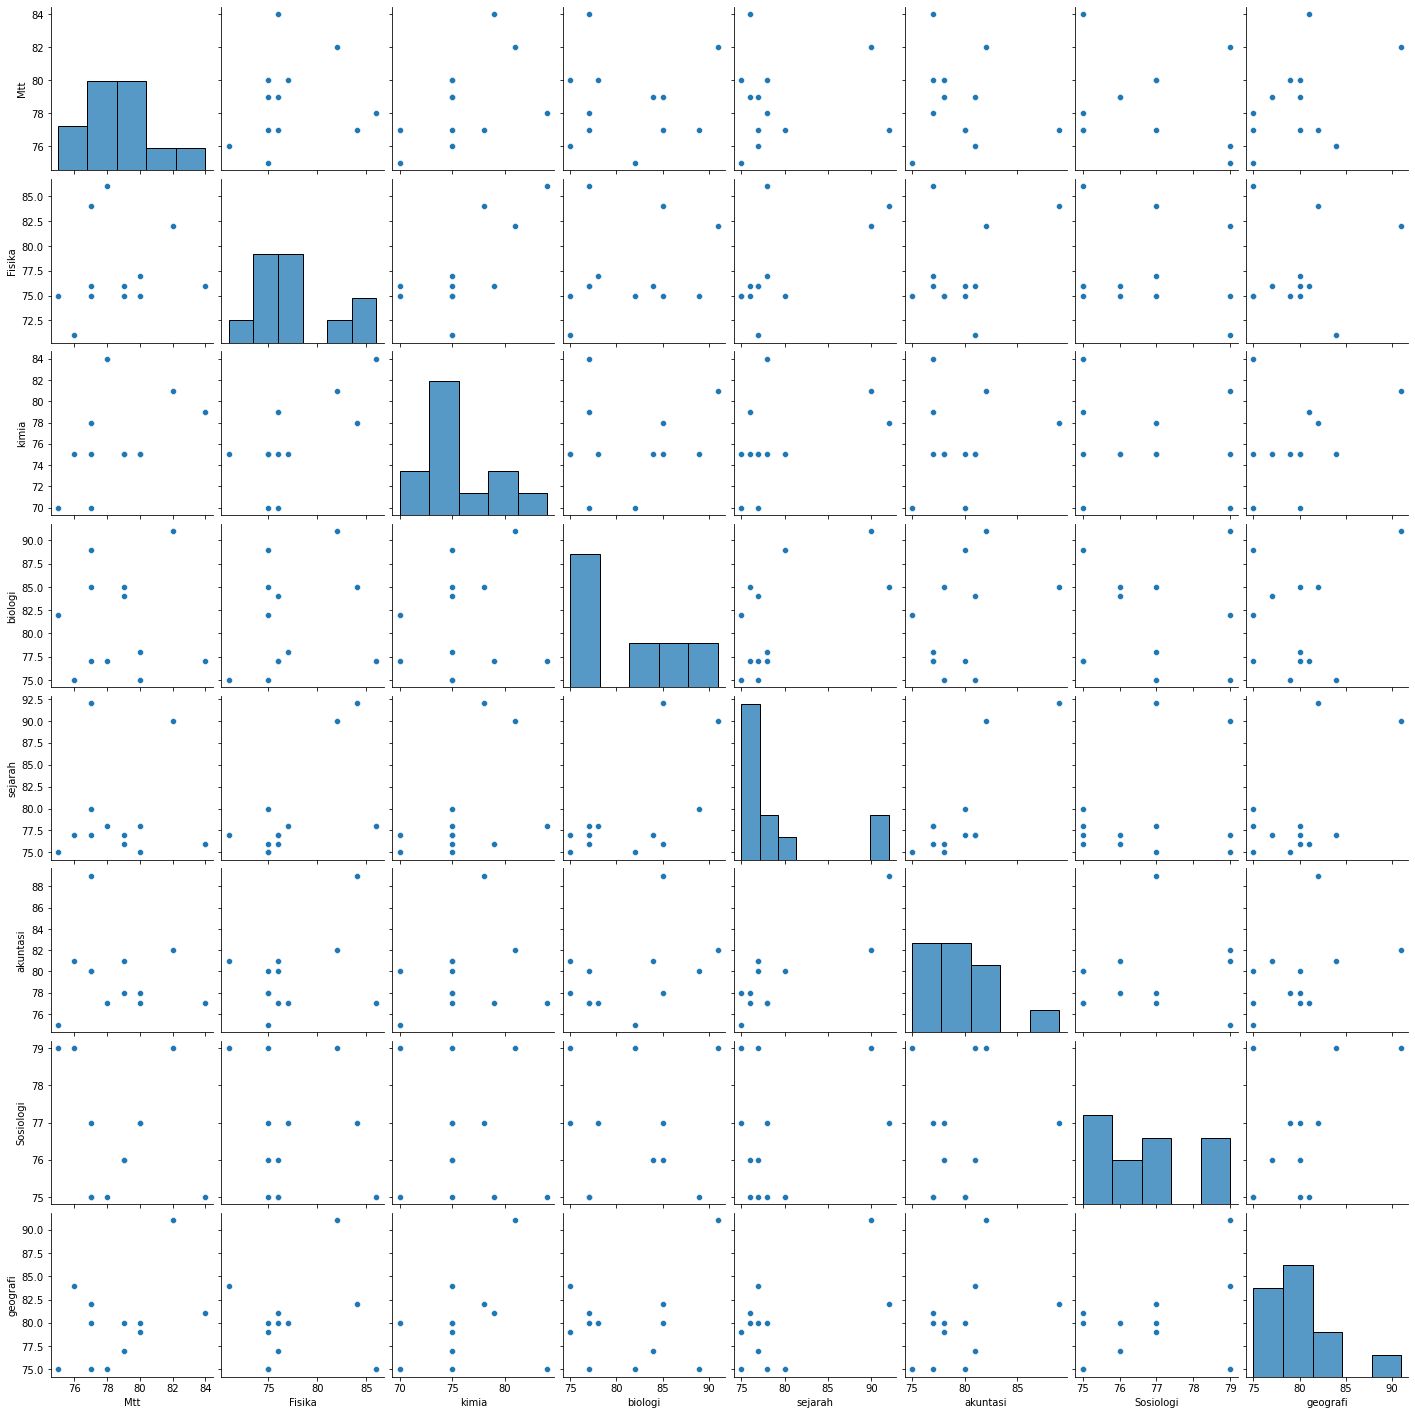

In [18]:
# Menampilkan sebaran data dengan pairplot
sns.pairplot(data.iloc[:, 2:]) 
# Menggunakan kolom ke-2 sampai terakhir (Mtt hingga geografi)
plt.show()

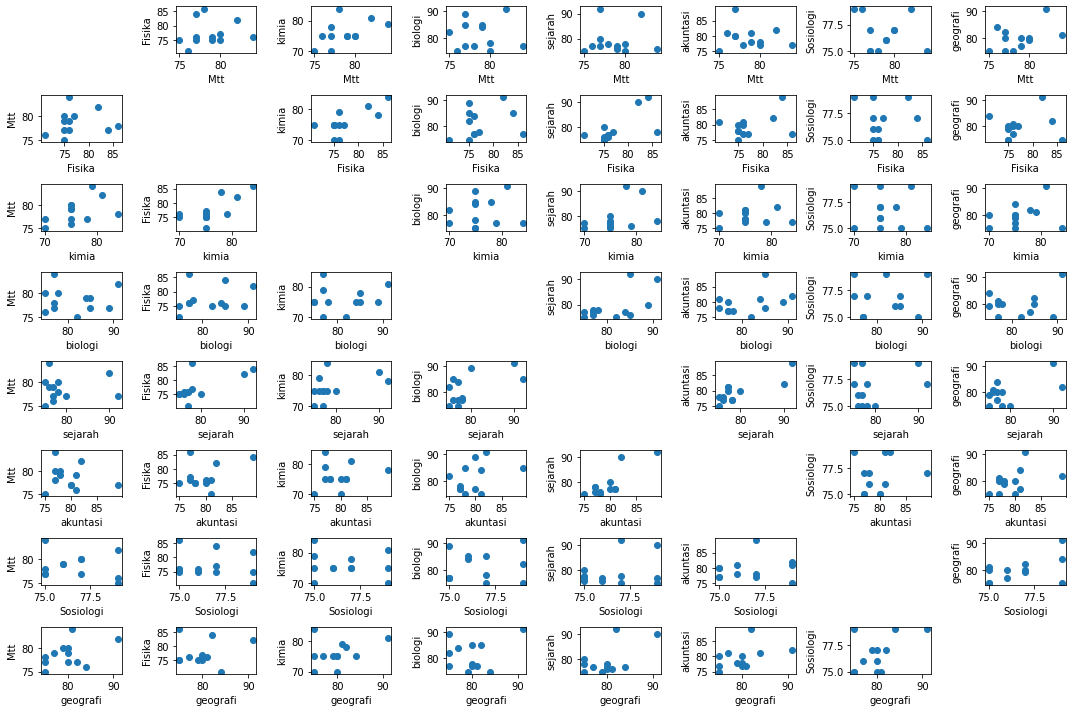

In [19]:
# Menampilkan sebaran data dengan scatter plot
columns = data.columns[2:]
# Mengambil kolom fitur (mulai dari kolom ke-2)
n = len(columns)
plt.figure(figsize=(15, 10))
for i in range(n):
    for j in range(n):
        if i != j:
            plt.subplot(n, n, i * n + j + 1)
            plt.scatter(data[columns[i]], data[columns[j]], marker='o')
            plt.xlabel(columns[i])
            plt.ylabel(columns[j])
plt.tight_layout()
plt.show()

In [20]:
# Membuat data dari kolom Mtt hingga geografi (indeks 2 hingga 9)
data = data.iloc[:, 2:10].to_numpy()

In [21]:
# Menjalankan Fuzzy C-Means
n_clusters = 3 
# Menentukan jumlah cluster
cntr, u, u0, d, jm, p, fpc = cmeans(data.T, n_clusters, 2, error=0.005, maxiter=1000)

In [22]:
# Hasil dari pusat cluster
print("Pusat Cluster:")
print(cntr)

Pusat Cluster:
[[79.39808406 75.94338197 75.35804427 76.89093927 76.64615117 78.09847138
  76.63973543 79.88433989]
 [78.03803972 75.83835003 74.77632503 84.01585574 77.23440198 79.07045649
  76.15244438 77.44886055]
 [79.47426603 82.89111701 79.54263681 87.66393272 90.41558523 85.10681489
  77.92357461 86.16874711]]


In [23]:
# Hasil atribusi keanggotaan
print("Atribusi Keanggotaan:")
print(u)

Atribusi Keanggotaan:
[[0.14503732 0.70997849 0.08520144 0.44519427 0.07640703 0.35902375
  0.16324352 0.63302988 0.06759638 0.90501234 0.6394591  0.88715599]
 [0.82977382 0.2321353  0.10266371 0.36964007 0.0904273  0.57850204
  0.74809107 0.31628592 0.91983913 0.08167864 0.27633123 0.09974784]
 [0.02518886 0.05788621 0.81213485 0.18516566 0.83316566 0.06247421
  0.08866541 0.05068419 0.01256449 0.01330902 0.08420967 0.01309617]]


In [24]:
# Menghitung label keanggotaan kelas (cluster)
fcm_labels = np.argmax(u, axis=0)
print("Label Keanggotaan Kelas (Cluster):")
print(fcm_labels)

Label Keanggotaan Kelas (Cluster):
[1 0 2 0 2 1 1 0 1 0 0 0]


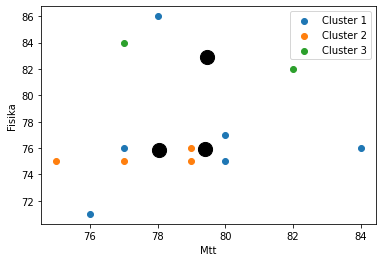

In [25]:
# Plot data dengan warna sesuai dengan cluster
cluster_membership = np.argmax(u, axis=0)
for i in range(n_clusters):
    plt.scatter(data[cluster_membership == i, 0], data[cluster_membership == i, 1], label=f'Cluster {i + 1}')
# Plot pusat cluster
for center in cntr:
    plt.scatter(center[0], center[1], marker='o', s=200, color='black')
plt.xlabel('Mtt')
plt.ylabel('Fisika')
plt.legend()
plt.show()

In [26]:
# Data yang sudah dihitung sebelumnya
fcm_centers = cntr.T  # cntr adalah pusat cluster dari perhitungan FCM
fcm_labels = fcm_labels  # Label keanggotaan kelas yang sudah dihitung

Text(0.5, 1.0, 'Sebaran Data')

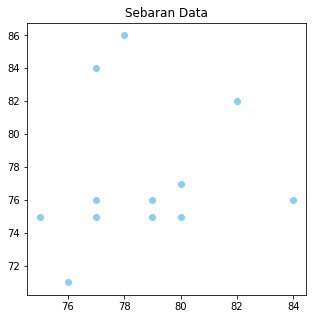

In [27]:
# Plot sebaran data dengan label keanggotaan kelas
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='#89cff0')
plt.title('Sebaran Data')

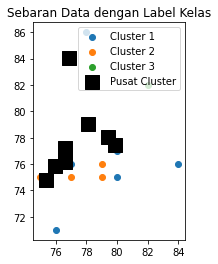

In [28]:
# Plot sebaran data dengan warna sesuai dengan label keanggotaan kelas
plt.subplot(1, 2, 2)
for i in range(n_clusters):
    plt.scatter(data[fcm_labels == i, 0], data[fcm_labels == i, 1], label=f'Cluster {i + 1}')
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker="s", s=200, color='black', label='Pusat Cluster')
plt.title('Sebaran Data dengan Label Kelas')
plt.legend()

plt.show()

# THANK YOU